<a href="https://colab.research.google.com/github/sowmya-sree-b/Netflix_EDA/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Libraries**

In [37]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

# **Loading dataset and setting dataframe**

In [4]:
import pandas as pd
df_eda=pd.read_csv("/content/drive/MyDrive/Projects /datasets/Netflix_EDA/netflix_titles.csv")
df_eda.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df_eda.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# **Data Cleaning and Profiling**

**Checking for any missing values in the given dataset**

In [6]:
print(df_eda.isnull().any())

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


**Count of missing values in each column in the dataset **

In [7]:
print(df_eda.T.apply(lambda x: x.isnull().sum(), axis = 1))

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Total count of missing values in the dataset.

In [8]:
df_eda.isnull().sum().sum()

4307

In [9]:
df_eda.shape[0]

8807

**Handling missing values in the dataset**

In [10]:
#Imputation 
df_eda.dropna(subset = ["date_added", "rating","duration"], inplace = True)
df_eda.country.fillna("Country Unavailable", inplace = True)
df_eda.director.fillna("No Director", inplace = True)
df_eda.cast.fillna("No Cast", inplace = True)

# **Exploaratory Analysis and Visualization**

Visualization : Overview of Netflix content.

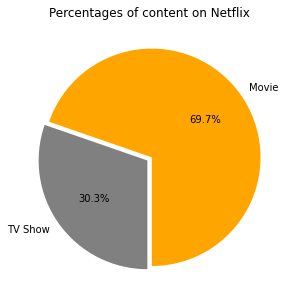

In [34]:
# plotting
plt.figure(figsize =(15,5))
plt.title("Percentages of content on Netflix")

#data
x = df_eda.type.value_counts()
gp = plt.pie(x, explode=(0.025,0.025), labels=x.index, colors=['orange','grey'], autopct='%1.1f%%', startangle=270)

plt.show()

TypeError: ignored

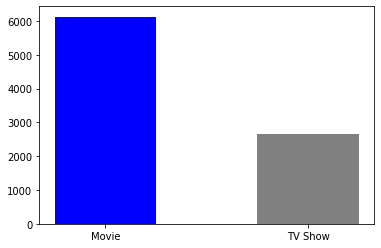

In [49]:
#data
x = df_eda.type.value_counts()
bp = plt.bar(x.index, x, width = 0.5, bottom = None, color = ('blue','grey'))

for i in range(x):
  plt.text(i, x[i])
plt.show()

Visualization : analyzing content add as per years.

In [51]:
#data
df_movies = df_eda[df_eda.type.str.contains("Movie")]
df_shows = df_eda[df_eda.type.str.contains("TV Show")]

df_eda.year_added = pd.DatetimeIndex(df_eda.date_added).year
df_movies.year_added = pd.DatetimeIndex(df_movies.date_added).year
df_shows.year_added = pd.DatetimeIndex(df_shows.date_added).year

netflix_year_df = df_eda.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year","year_added": "count"})
netflix_year_df = netflix_year_df[netflix_year_df != 2021]

movies_year_df = df_movies.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
movies_year_df = movies_year_df[movies_year_df != 2020]

shows_year_df = df_shows.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
shows_year_df = shows_year_df[shows_year_df != 2020]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


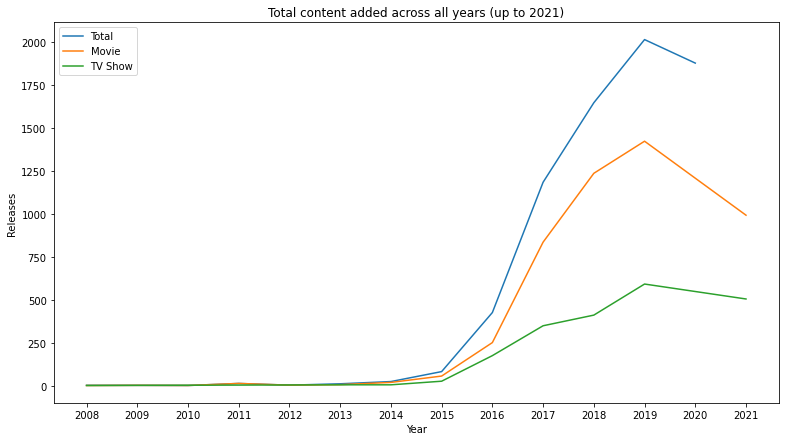

In [54]:
#plotting
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=netflix_year_df, x='year', y='date_added')
sns.lineplot(data=movies_year_df, x='year', y='date_added')
sns.lineplot(data=shows_year_df, x='year', y='date_added')
ax.set_xticks(np.arange(2008, 2022, 1))
plt.title("Total content added across all years (up to 2021)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Visualization : Top Actor based on number of titles in shows.

In [18]:
#data
cast_filter_movie = df_eda[df_eda.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

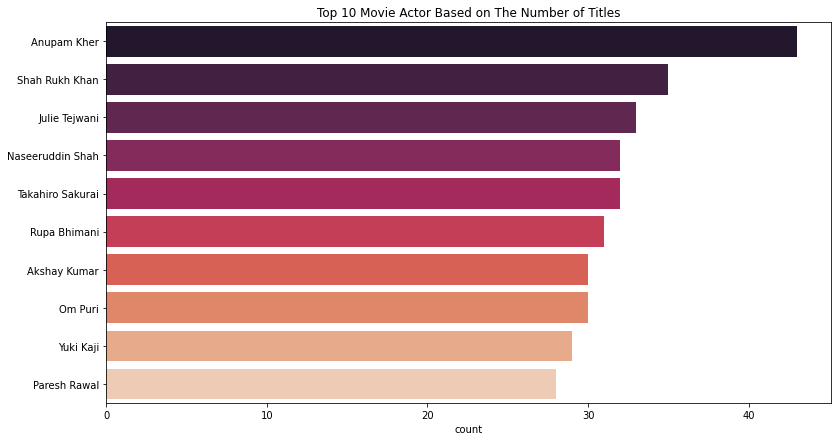

In [20]:
#plotting
plt.figure(figsize=(13,7))
plt.title('Top 10 Movie Actor Based on The Number of Titles')
sns.countplot(y = cast_filter_movie, order=cast_filter_movie.value_counts().index[:10], palette='rocket')
plt.show()

Visualization : Top Actor based on number of Titles in Netflix Shows.

In [55]:
#data
cast_filter_shows = df_shows[df_shows.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

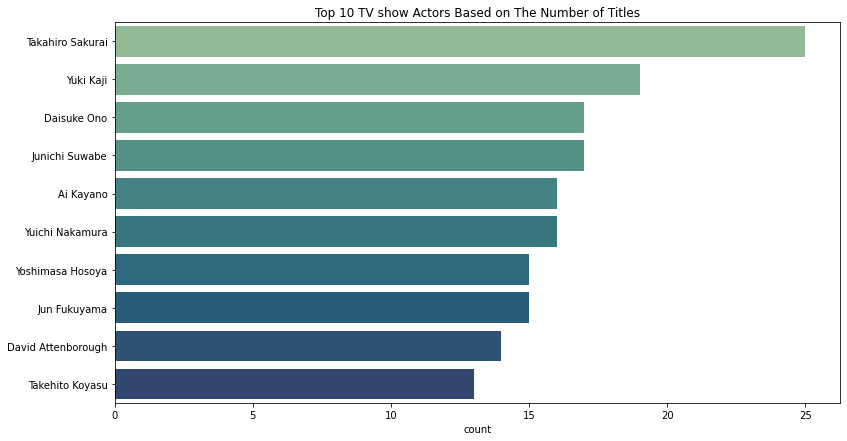

In [61]:
#plotting 
plt.figure(figsize=(13,7))
plt.title('Top 10 TV show Actors Based on The Number of Titles')
sns.countplot(y = cast_filter_shows, order=cast_filter_shows.value_counts().index[:10], palette='crest')
plt.show()

Visualization : Top Genres 

In [62]:
#data
genres_filter = df_eda.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

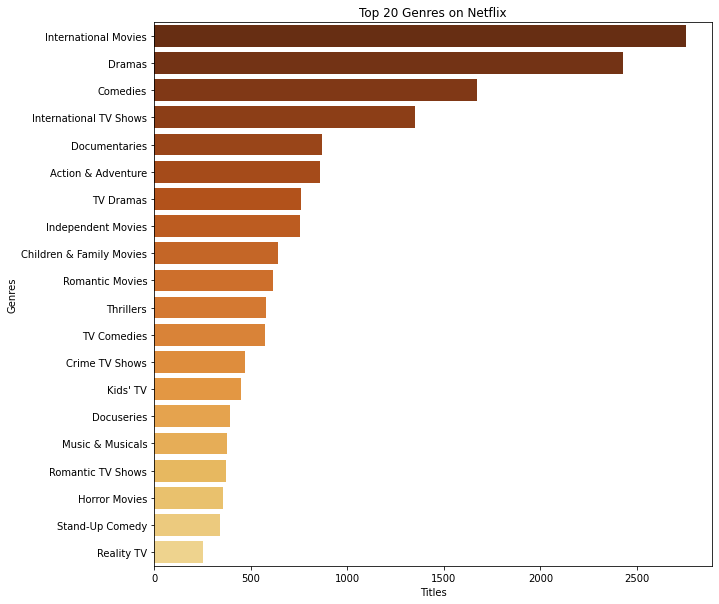

In [69]:
from seaborn import palettes
plt.figure(figsize=(10,10))
palette = sns.color_palette("YlOrBr", n_colors= 27)
palette.reverse()
g = sns.countplot(y = genres_filter, order=genres_filter.value_counts().index[:20], palette=palette)
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()


Visualization : Top 5 Directors contributed on Netflix

In [70]:
#data
directors_filter = df_eda[df_eda.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

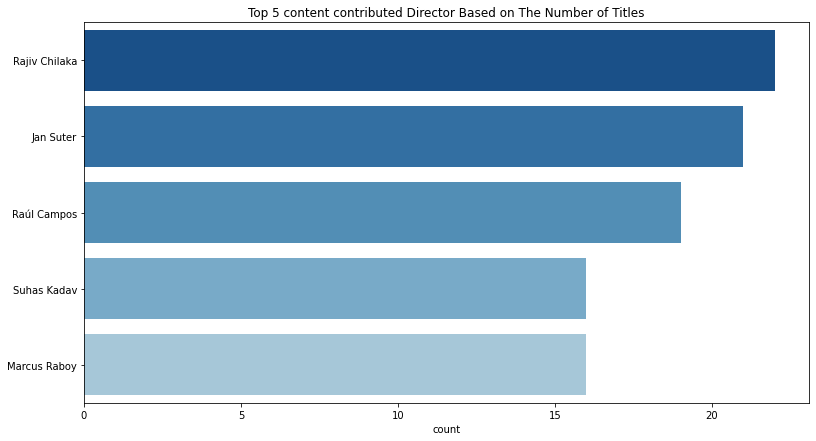

In [73]:
#plotting
plt.figure(figsize=(13,7))
plt.title('Top 5 content contributed Director Based on The Number of Titles')
palette = sns.color_palette("Blues", n_colors=7)
palette.reverse()
sns.countplot(y = directors_filter, order=directors_filter.value_counts().index[:5], palette=palette)
plt.show()

Visualization : Top 10 Countries Contributor on Netflix.

In [75]:
#data
country_filter = df_eda[df_eda.country != 'Country Unavailable'].set_index('title').country.str.split(', ', expand = True).stack().reset_index(level =1, drop = True)

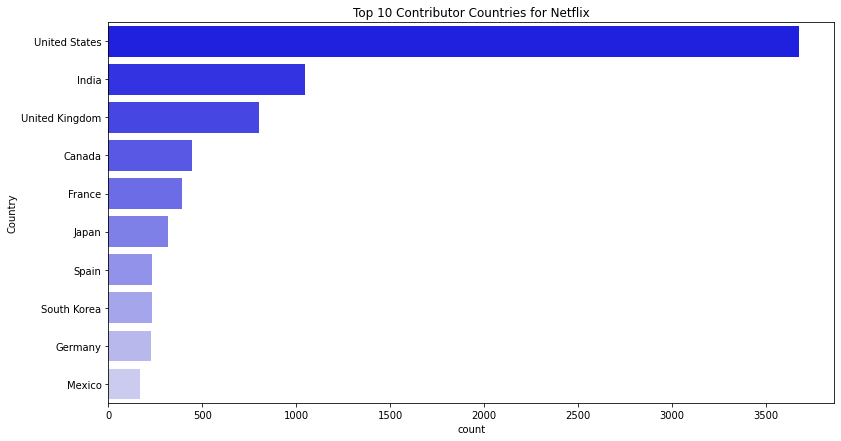

In [79]:
#plotting
plt.figure(figsize=(13,7))
plt.title('Top 10 Contributor Countries for Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
palette = sns.color_palette("light:b", n_colors=12)
palette.reverse()
g = sns.countplot(y = country_filter, order=country_filter.value_counts().index[:10], palette = palette)
plt.show()